In [ ]:
%load_ext autoreload
%autoreload 2

In [1]:
from __future__ import annotations
import numpy as np
import scipy

from mflex.simulate.simulate_boundary import dalmatian

from mhsflex.field2d import Field2dData
from mhsflex.vis import plot, show_poles, show_footpoints
from mhsflex.metrics import compare_field3d

from matplotlib import rc, colors
import matplotlib.pyplot as plt
from scipy.io import readsav

from mhsflex.field2d import check_fluxbalance, alpha_HS04
import mhsflex.fluxbalance
from mhsflex.metrics import pearson_corr_coeff_issi_2

rc("font", **{"family": "serif", "serif": ["Times"]})
rc("text", usetex=True)

c4 = (1.000, 0.224, 0.376)
c1 = (0.439, 0.788, 1.000)
c3 = "black"
c2 = (0.420, 0.502, 1.000)

cmap = colors.LinearSegmentedColormap.from_list(
    "cmap",
    (
        (0.000, (0.000, 0.000, 0.000)),
        (0.500, (0.659, 0.659, 0.659)),
        (1.000, (1.000, 1.000, 1.000)),
    ),
)

cmap2 = colors.LinearSegmentedColormap.from_list(
    "cmap2", ((0.000, (0.984, 1.000, 0.000)), (1.000, (1.000, 0.988, 0.761)))
)

c2 = (0.420, 0.502, 1.000)
c3 = "black"
c4 = (1.000, 0.224, 0.376)
c5 = (0.784, 0.231, 0.576)
c7 = (0.992, 0.251, 0.733)
c8 = (0.867, 0.871, 0.184)
c9 = (0.949, 0.922, 0.678)
c10 = (0.984, 0.455, 0.231)
c11 = (0.765, 0.835, 0.922)
c12 = (0.965, 0.694, 0.486)
c13 = (0.992, 0.584, 0.820)

/Users/lilli/Library/Caches/pypoetry/virtualenvs/mflex-cNoQEf_u-py3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
Python = np.array([52, 70, 75, 101, 100, 117, 191, 269, 338, 366, 539, 664, 1186, 1278, 2036, 2619, 3662, 4898, 7106, 9704, 13330, 16397, 18243, 22991])

In [3]:
idl = np.array([329, 347, 436, 488, 548, 575, 711, 701, 779, 869, 1016, 1024, 1194, 1151, 1174, 1085, 1182, 1078, 1105, 1027, 987, 921, 930, 839])

In [4]:
julia = np.array([260, 239, 241, 276, 291, 322, 331, 350, 385, 427, 431, 500, 537, 609, 551, 643, 756, 860, 955, 1221, 1574, 1582, 1898, 1893])

In [5]:
fortran = np.array([873, 910, 931, 1076, 1043, 1068, 1288, 1205, 1317, 1287, 1394, 1376, 1581, 1503, 1503, 1313, 1424, 1548, 1696, 1914, 2030, 2021, 1839, 1894])

In [6]:
matlab = np.array([312, 462, 571, 893, 1144, 1566, 2149, 2449, 2755, 3307, 3754, 4284, 5511, 7355, 8132, 8931, 10264, 12449, 14760, 17293, 18837, 19624, 17402, 19700])

In [7]:
all = np.array([234032, 253850, 263576, 282626, 287016, 304442, 326168, 340745, 366911, 403536, 405418, 400193, 432202, 422555, 425328, 431756, 451537, 458714, 487036, 542685, 536214, 567522, 534829, 561781])

In [11]:
years = np.array(range(2000, 2024))

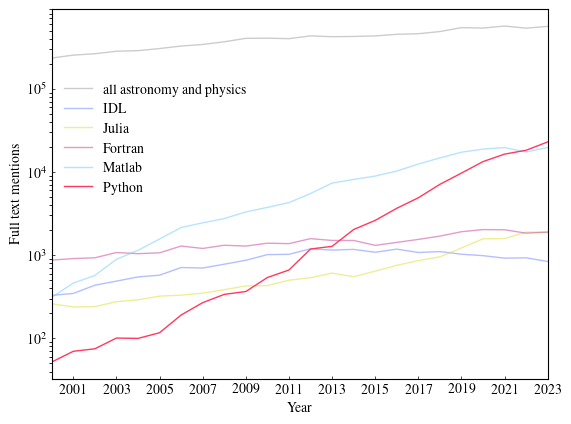

In [57]:

plt.plot(years, all, lw=1.0, c=c3, alpha=0.2, label="all astronomy and physics")
plt.plot(years, idl, lw=1.0, c=c2, alpha=0.5, label="IDL")
plt.plot(years, julia, lw=1.0, c=c8, alpha=0.5,label="Julia")
plt.plot(years, fortran, lw=1.0, c=c5, alpha=0.5,label="Fortran")  # , linestyle=(5,(5,5)))
plt.plot(years, matlab, lw=1.0, c=c1, alpha=0.5,label="Matlab")
plt.plot(years, Python, lw=1.0, c=c4, label="Python")

plt.yscale("log")
plt.xlabel("Year")
plt.ylabel(r"Full text mentions")
plt.xticks(years[1::2])
plt.xlim(2000, 2023)
plt.tick_params(direction="in", length=2, width=0.5)
plt.legend(frameon=False, loc="center left", bbox_to_anchor=(0, 0.65))
plotname = "/Users/lilli/Desktop/Thesis/pythonmentions.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)

plt.show()
